In [4]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import openweathermapy.core as owm
from citipy import citipy
from pprint import pprint
#import seaborn as sns


from config import api_key



In [5]:
# Create latitudes and longitudes

latitude = np.random.uniform(-90,90,1000) # Random list of 2000 items with a range of -90 to +90
longitude = np.random.uniform(-180,180,1000) # Random list of 2000 items with a range of -180 + 180

#print (latitude)
#print (longitude)

In [6]:
city_df = pd.DataFrame({"Latitude": latitude, "Longitude": longitude})
city_df.head()

,Latitude,Longitude
0,-84.363598,130.209142
1,57.762121,115.313051
2,12.936720,-50.281804
3,-62.707432,-30.918227
4,-0.195318,-150.742215


In [7]:
city_df["City"] = ""
city_df["Country Code"] = ""
city_df["Temperature"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Humidity"] = ""
#city_df["URL"] = ""
city_df.head()

,Latitude,Longitude,City,Country Code,Temperature,Cloudiness,Wind Speed,Humidity
0,-84.363598,130.209142,,,,,,
1,57.762121,115.313051,,,,,,
2,12.936720,-50.281804,,,,,,
3,-62.707432,-30.918227,,,,,,
4,-0.195318,-150.742215,,,,,,


In [8]:
for index, row in city_df.iterrows():
    latitude = row['Latitude']
    longitude = row ["Longitude"]
    
    city_df.loc[index, "City"]= citipy.nearest_city(latitude, longitude).city_name
    city_df.loc[index, "Country Code"]= citipy.nearest_city(latitude, longitude).country_code

    
city_df = city_df.drop_duplicates(subset=["City","Country Code"], keep="first")

In [9]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

In [10]:
# Loop through the city_df and call the target url to pull the required information
# Print Retrieving Information and Log

print("Beginning Data Retrieval" + "\n" + "------------------------")

for index, row in city_df.iterrows():
    city = row['City']
    country = row ["Country Code"]
    city_country = str(city)+ "," + str(country)
    
    try:

        current_weather_url = base_url + "&appid=" + api_key + "&q=" + city_country
        current_weather = requests.get(current_weather_url).json()
        print (current_weather_url)
                
        city_df.loc[index, "Temperature"]= current_weather['main']['temp']
        city_df.loc[index, "Humidity"]=  current_weather['main']['humidity']
        city_df.loc[index, "Cloudiness"]=  current_weather['clouds']['all']
        city_df.loc[index, "Wind Speed"]=  current_weather['wind']['speed']

   
    except:
        city_df.loc[index, "Temperature"]= "No Data from API"
        city_df.loc[index, "Humidity"]=  "No Data from API"
        city_df.loc[index, "Cloudiness"]=  "No Data from API"
        city_df.loc[index, "Wind Speed"]=  "No Data from API"
        

city_df = city_df[["City", "Country Code", "Latitude", "Longitude","Temperature", "Humidity", "Cloudiness", "Wind Speed"]]



Beginning Data Retrieval
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=new norfolk,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=kropotkin,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=iracoubo,gf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=mar del plata,ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=atuona,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=bengkulu,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=bluff,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=salinas,ec
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=turochak,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=vestmannaeyjar,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=mouzakion,gr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=peniche,pt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=pekan,my
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=turcianske teplice,sk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=alice springs,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=antofagasta,cl
http://api.openweathermap.org/data/2.5/weather?units=Imperi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=grindavik,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=hamilton,bm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=cervo,es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=laibin,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=warwick,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=qaqortoq,gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=bubaque,gw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=vanavara,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=kaitangata,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=labuhan,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=nizhniy odes,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=dunedin,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=neiafu,to
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=nynashamn,se
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=faanui,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=torrington,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=castro,cl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=halalo,wf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=biak,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=payo,ph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=cercal,pt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=homer,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=bolungarvik,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=diamantino,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5eb

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=airai,pw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=rehli,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=sorsk,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=santa marinella,it
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=bulolo,pg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=carnarvon,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=aquiraz,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=namibe,ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=vernon,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=anadyr,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=zalesovo,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=santa maria,cv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=jacareacanga,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=wajima,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=san ramon,bo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a920009eae79c5ebb59b94ec&q=copiapo,cl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=2365c567a92

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,new norfolk,au,-84.363598,130.209142,69.33,52,20,5.82
1,kropotkin,ru,57.762121,115.313051,36.68,93,68,5.14
2,iracoubo,gf,12.936720,-50.281804,77.22,77,36,6.26
3,mar del plata,ar,-62.707432,-30.918227,73.02,38,0,15.01
4,atuona,pf,-0.195318,-150.742215,82.51,100,0,11.99


In [11]:

city_df.to_csv("constructed_city_df.csv", header = True)

In [12]:
# Clean the constructed data frame without "No Data from API"
city_df_clean = city_df[city_df["Temperature"]!="No Data from API"]

city_df_clean
city_df_clean.to_csv("city_df_clean.csv", header = True)


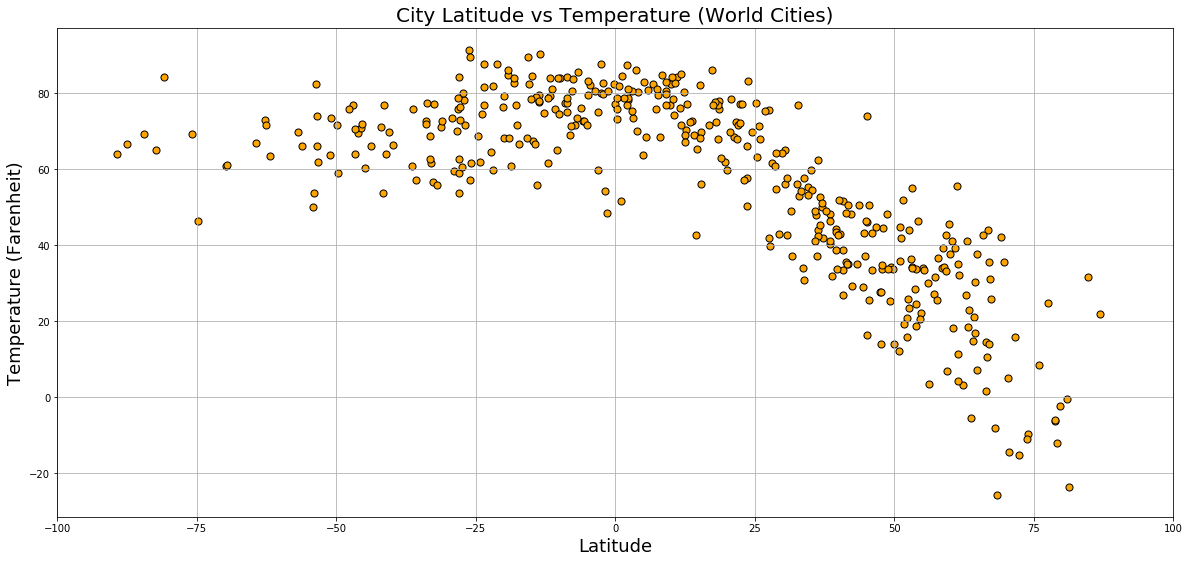

In [14]:
# Build a scatter plot for Temperature (F) vs. Latitude
#sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Temperature"], marker = "o" , color = "orange", s=50, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (World Cities)" , fontsize = 20)
plt.ylabel("Temperature (Farenheit)" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsTemperature.png")
plt.show()

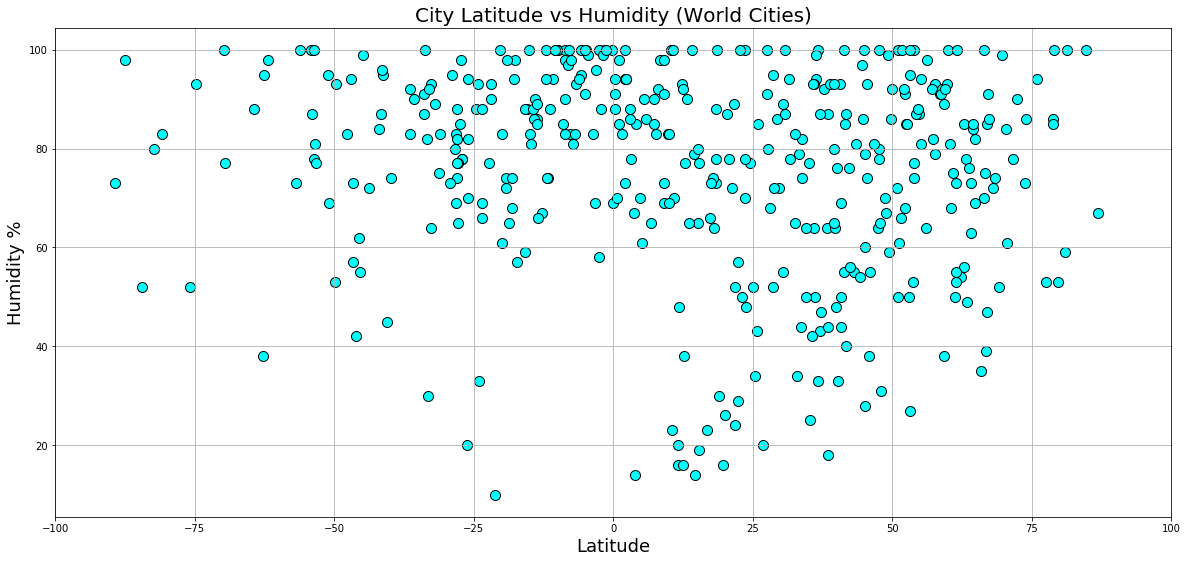

In [15]:
# Build a scatter plot for Humidity (F) vs. Latitude
#sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Humidity"], marker = "o" , color = "aqua", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (World Cities)" , fontsize = 20)
plt.ylabel("Humidity %" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsHumidity.png")
plt.show()

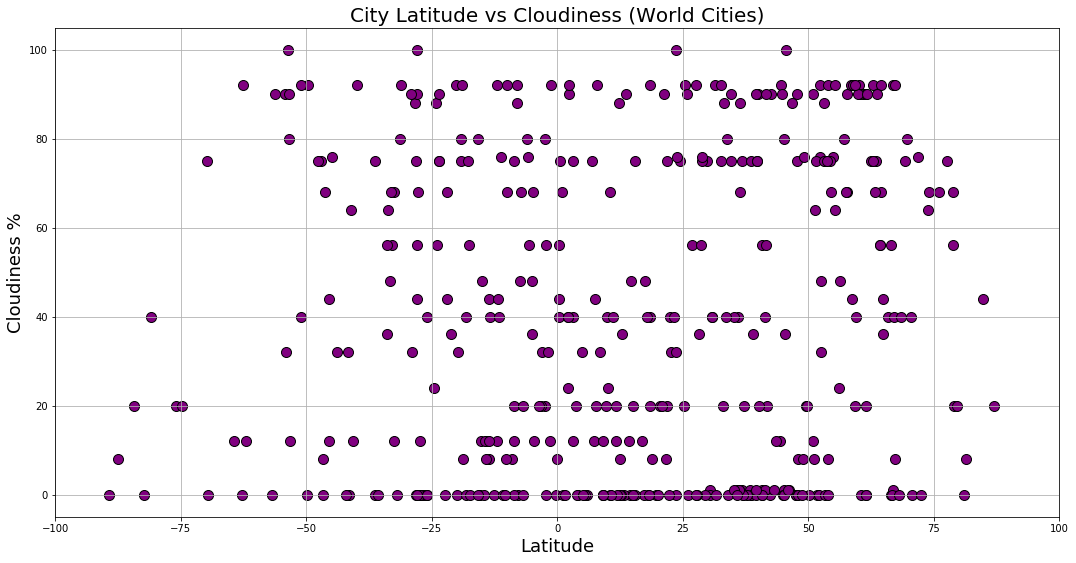

In [16]:
# Build a scatter plot for Cloudiness vs. Latitude
#sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Cloudiness"], marker = "o" , color = "purple", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (World Cities)" , fontsize = 20)
plt.ylabel("Cloudiness %" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsCloudiness.png")
plt.show()

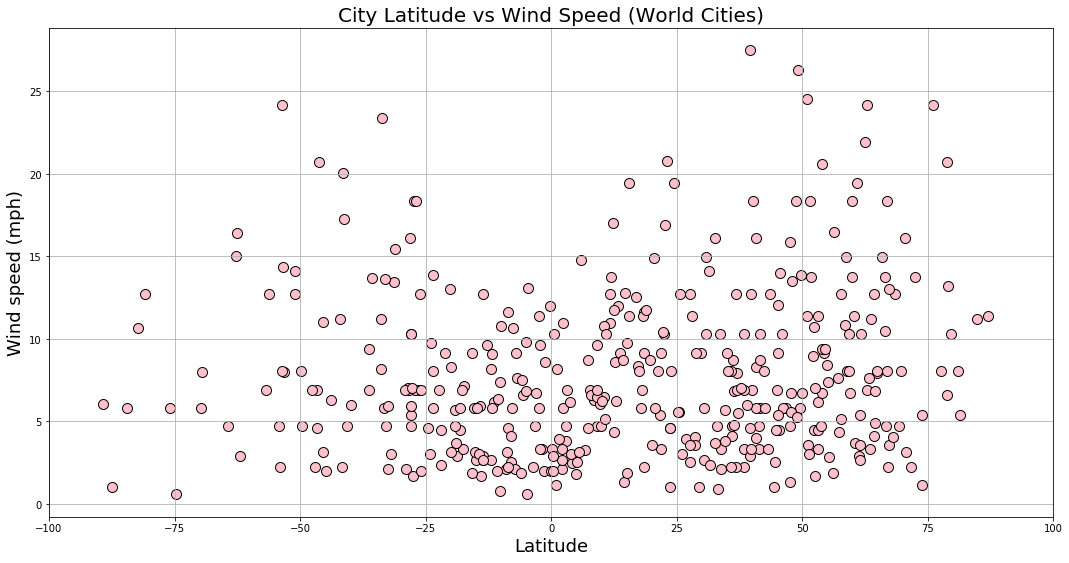

In [17]:
# Build a scatter plot for Wind Speed vs. Latitude
#sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Wind Speed"], marker = "o" , color = "pink", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (World Cities)" , fontsize = 20)
plt.ylabel("Wind speed (mph)" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsWindspeed.png")
plt.show()

1) The percentage of humidity is higher across all cities near the equator
2) Majority of the cities have windspeed clustered in the range of 0 - 15 mph
3) The humidity near the equator tends to be in the range of 80 - 100 %